# FINAL EDA - 8_hos

## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [1]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

#import generic_funcions as gf
#import adherence_functions as af
import warnings
warnings.filterwarnings('ignore')

ruta_archivos = 'C:/Users/monic/documentos/ds4a/ds4a_team80/1_data_transformation/'

## 1. Módulo de Interés

In [2]:
modulo = 'hos' # Este equivale al 'prefi' del diccionario. El diccionario está en: 1_data_transformation/generic_functions.py
ad_marca = 'adeherencia_0'
ids = ['id','year','month',ad_marca]

#### t-test
* `hos_uce_sum_6`:  suma del número de días ECE del paciente en los últimos seis meses.
* `hos_uce_j_sum_6`:  suma del número de días ECE del paciente, con diagnóstico relacionado con asma, en los últimos seis meses.
* `hos_est_sum_6`: suma del número de días hospitalizado del paciente en los últimos seis meses.
* `hos_est_j_sum_6`: suma del número de días hospitalizado del paciente, con diagnóstico relacionado con asma, en los últimos seis meses.
* `hos_uce_sum_12`: suma del número de días hospitalizado del paciente en los últimos doce meses.
* `hos_uce_j_sum_12`: suma del número de días hospitalizado del paciente, con diagnóstico relacionado con asma, en los últimos seis meses.

#### Árbol de Decisión
* `hos_est_sum_12`: suma del número de días hospitalizado del paciente en los últimos doce meses.

## 2. Carga de Datos

In [3]:
base = pd.read_csv( ruta_archivos + 'base_adeherencia_features_0.csv', sep='|' )
base.head()

,id,year,month,adeherencia_0,key,far_rea_asma_sum_6,far_rea_total_sum_6,far_evo_aun_sum_6,far_cau_def_sum_6,far_cau_otra_sum_6,...,hab_alcohol_avg_12,hab_cigarrillo_avg_12,hab_ejercicio_avg_12,inc_con_sum_6,inc_inc_sum_6,inc_con_sum_12,inc_inc_sum_12,imc_avg_6,imc_avg_12,imc_foto
0,500547,2016,7,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3.0,0.0,3.0,NaN,NaN,NaN
1,500547,2019,3,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500547,2019,10,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN
3,500547,2019,12,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN
4,500547,2020,1,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN


In [4]:
variables = [i for i in base.columns if i.startswith( modulo + '_')]
df = base[ids + variables]
df.head()

,id,year,month,adeherencia_0,hos_num_sum_6,hos_num_j_sum_6,hos_uci_sum_6,hos_uci_j_sum_6,hos_uce_sum_6,hos_uce_j_sum_6,hos_est_sum_6,hos_est_j_sum_6,hos_num_sum_12,hos_num_j_sum_12,hos_uci_sum_12,hos_uci_j_sum_12,hos_uce_sum_12,hos_uce_j_sum_12,hos_est_sum_12,hos_est_j_sum_12
0,500547,2016,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500547,2019,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500547,2019,10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500547,2019,12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500547,2020,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(3663, 20)

## 3. Análisis
### 3.1. Completitud

In [6]:
# Se calcula el número de nulls por fila, y se descartan los registros con todo en null
df['nulls'] = df.isnull().sum(axis = 1)
todo_null = df.shape[1] - 5    #id, month, year, nuls, adeherencia_0
df = df[df['nulls'] < todo_null ].copy()
print("La base se reduce de "+ str(df.shape[0]) + " a " + str(base.shape[0]) +
      " registros. Que corresponde a un " + str(round(df.shape[0]/base.shape[0]*100, 2)) + "%.")
df.head()

La base se reduce de 568 a 3663 registros. Que corresponde a un 15.51%.


,id,year,month,adeherencia_0,hos_num_sum_6,hos_num_j_sum_6,hos_uci_sum_6,hos_uci_j_sum_6,hos_uce_sum_6,hos_uce_j_sum_6,...,hos_est_j_sum_6,hos_num_sum_12,hos_num_j_sum_12,hos_uci_sum_12,hos_uci_j_sum_12,hos_uce_sum_12,hos_uce_j_sum_12,hos_est_sum_12,hos_est_j_sum_12,nulls
9,502989,2017,1,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0
10,502989,2017,3,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,8
11,502989,2017,7,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,8
12,502989,2017,8,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,8
37,524006,2016,6,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0


### 3.2 Análisis Temporal

In [7]:
# se transforma la fecha para ser de tipo datetime
df['day'] = 1
df['fecha'] = pd.to_datetime(df[['year','month','day']])
df['fecha'] = df['fecha'].apply(lambda x: x.strftime('%Y%m'))

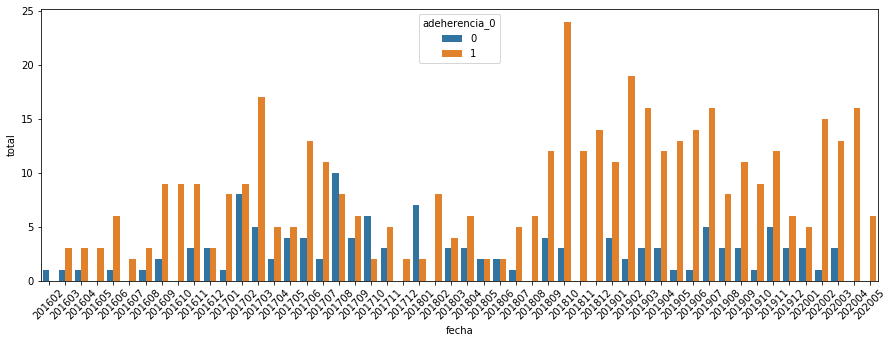

In [8]:
df_g = df.groupby(['fecha','adeherencia_0'])['id'].count().reset_index(name='total')

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.barplot(x="fecha", y="total", hue="adeherencia_0", data=df_g)
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Se encuentran registros a lo largo de toda la historia. Desde 201602 hasta 202005. Hay un pico de no-adherencia en 201712. 

### 3.3 Correlaciones

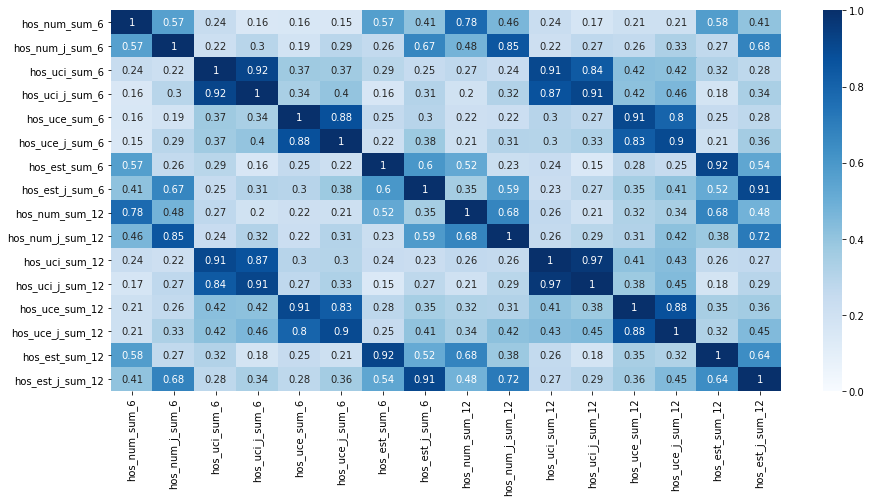

In [13]:
corrMatrix = df[variables].corr()

plt.figure(figsize=(15, 7))
sns.heatmap(corrMatrix, annot=True, vmin=0, vmax=1, cmap="Blues")
plt.show()

Se encuentra que las variables de otras enfermedades y de diagnóstico asma están altamente correlacionadas. No hay variables con correlaciones negativas.

### 3.4 Dispersión

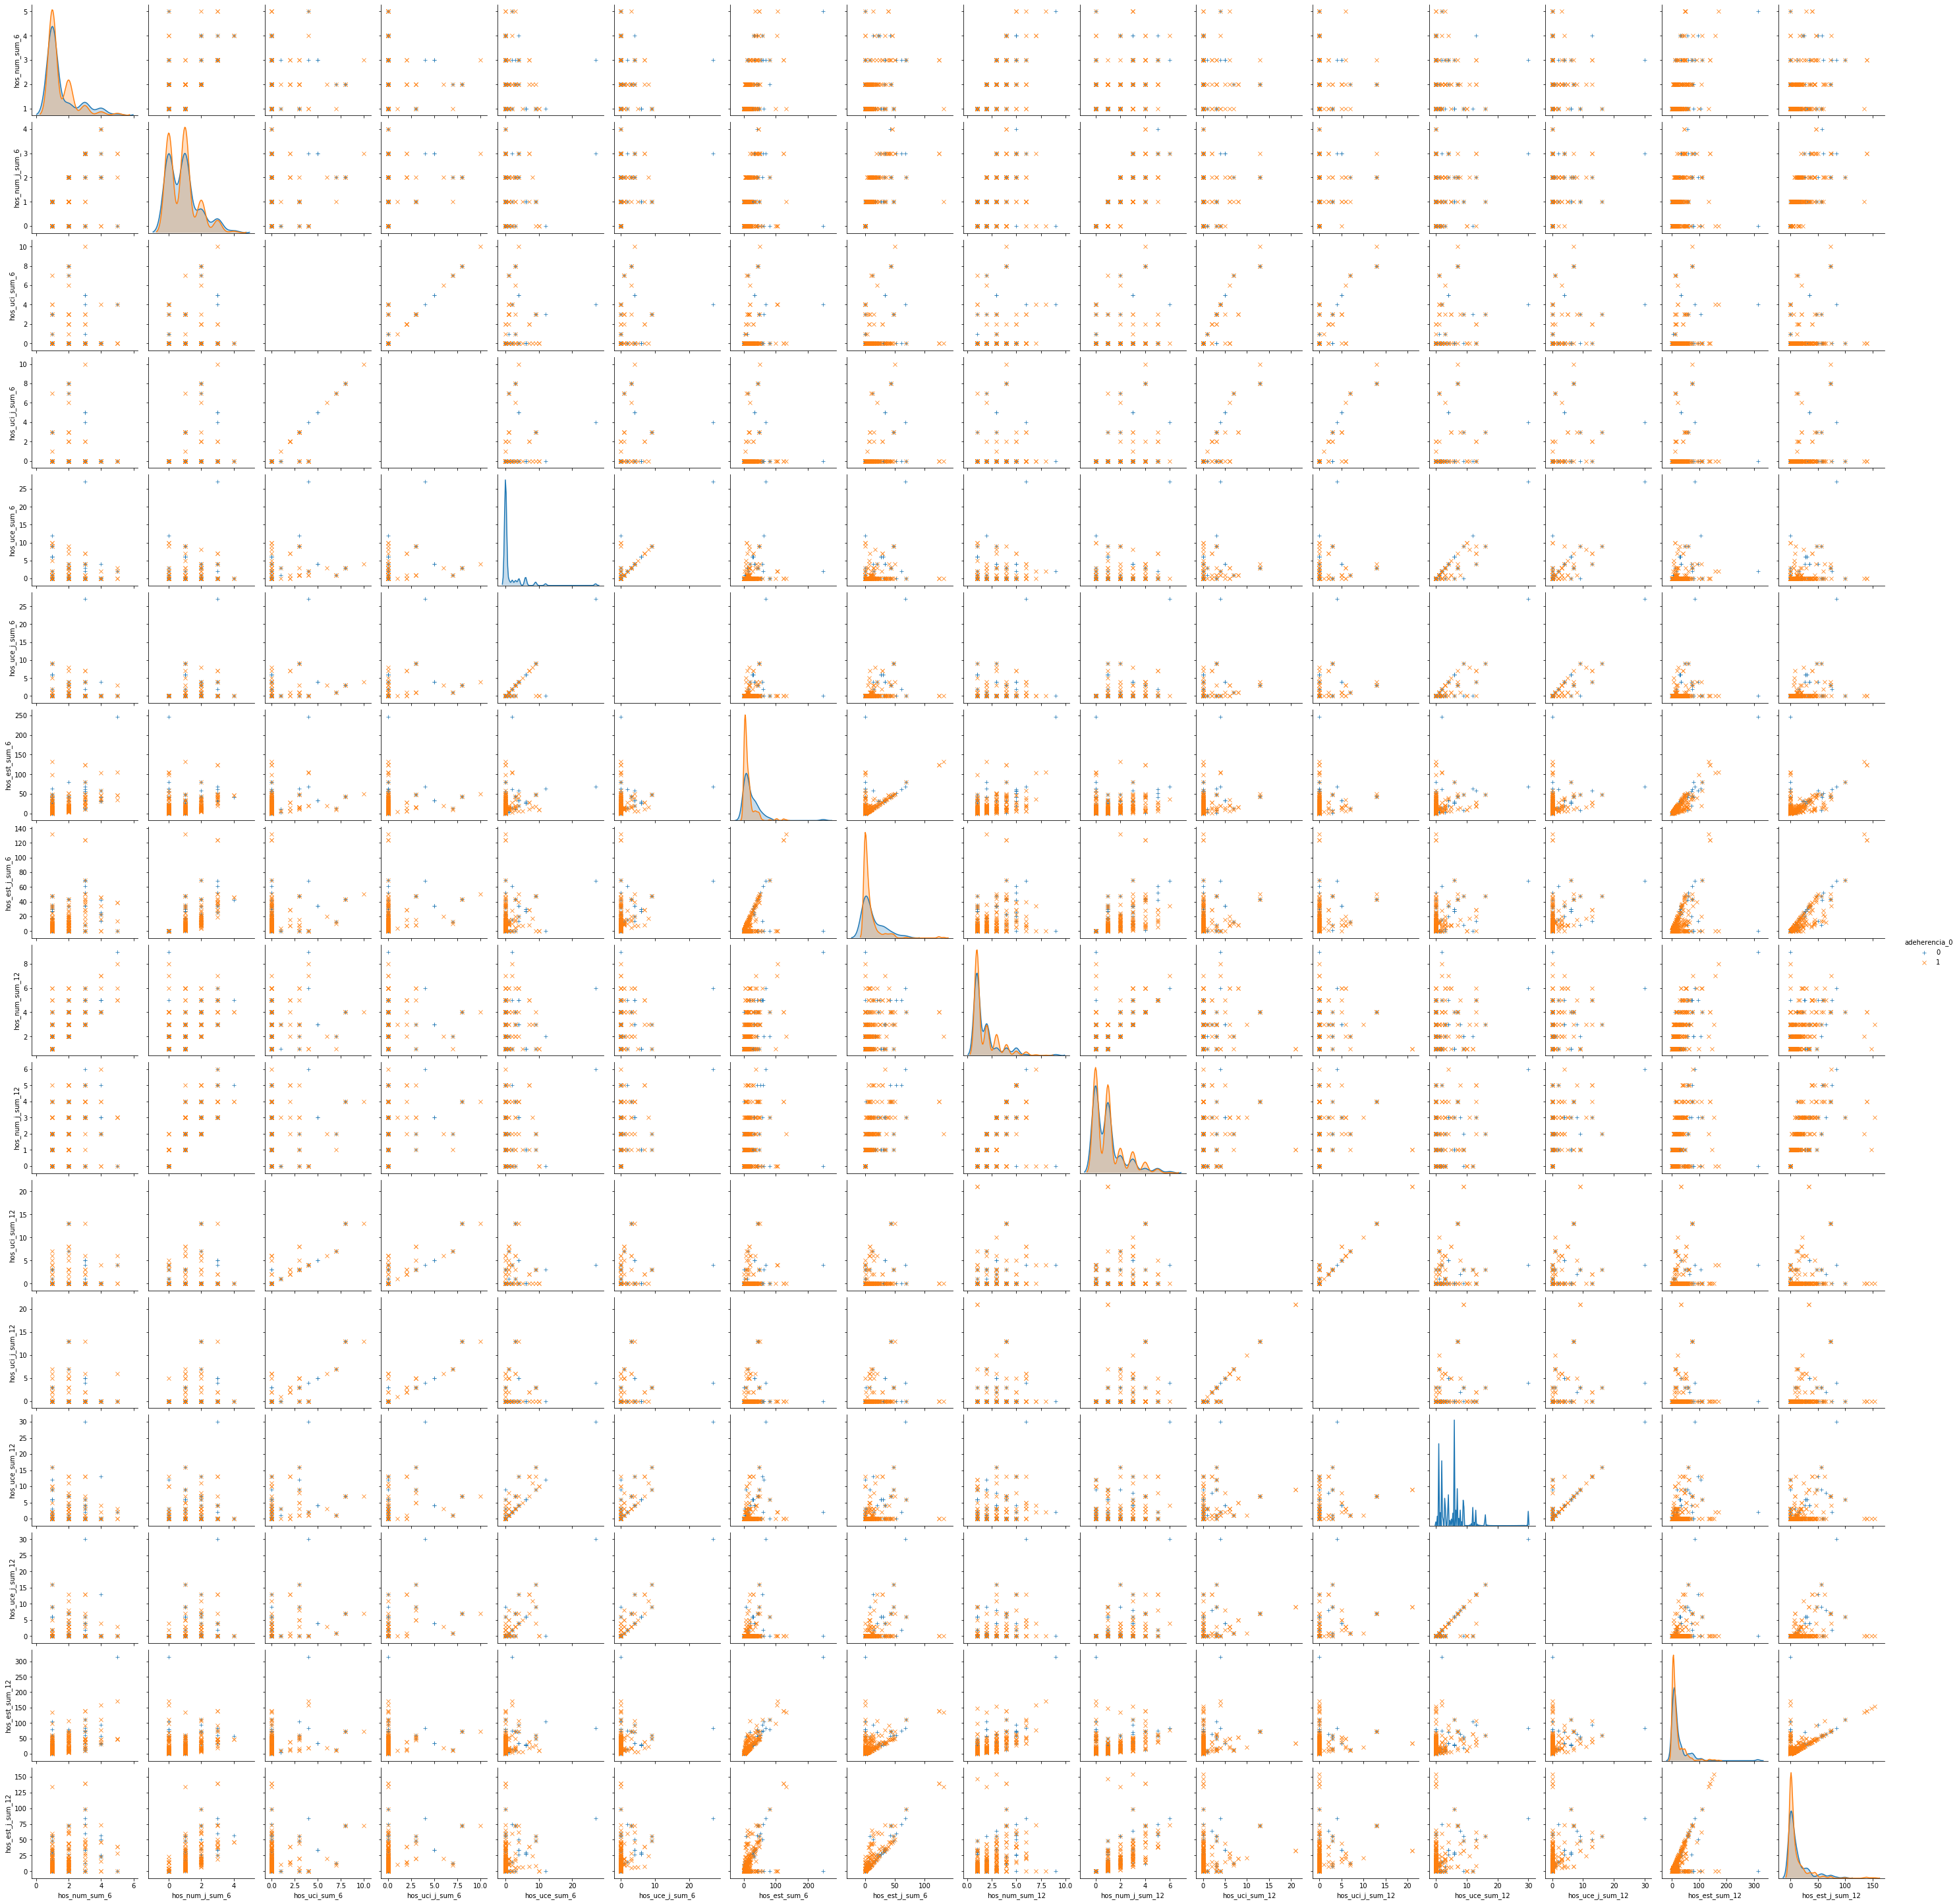

In [14]:
g = sns.pairplot(df[variables + ['adeherencia_0']], hue="adeherencia_0", markers=["+", "x"])

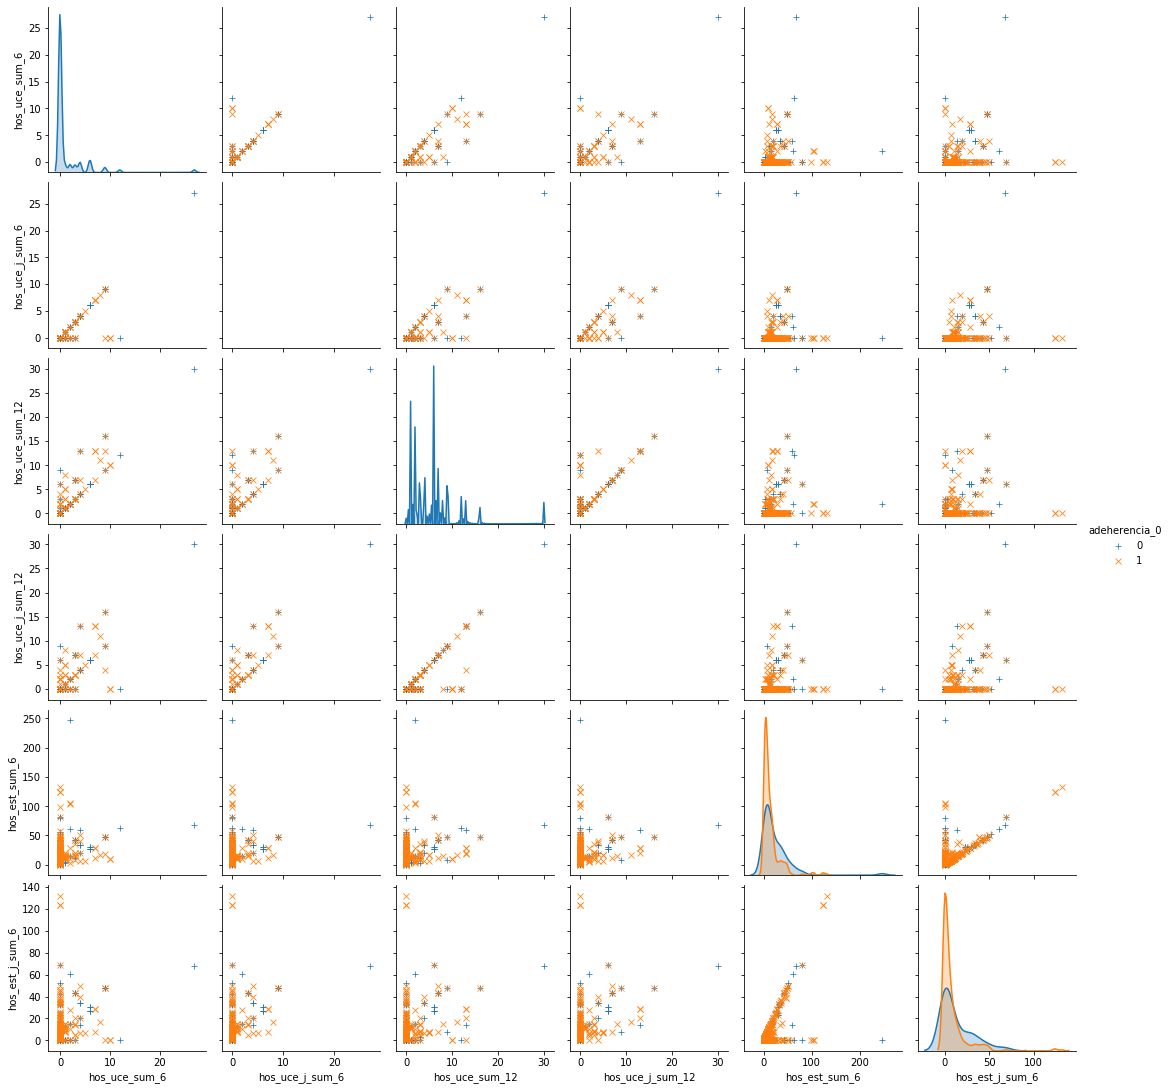

In [16]:
variables2 = ['hos_uce_sum_6', 'hos_uce_j_sum_6', 'hos_uce_sum_12', 'hos_uce_j_sum_12','hos_est_sum_6', 'hos_est_j_sum_6']
sns.pairplot(df[variables2 + ['adeherencia_0']], hue="adeherencia_0", markers=["+", "x"])

Variables relacionadas con `uce` tienen parecieran estar presentes sólo para pacientes no adherentes:

In [17]:
df[ df['adeherencia_0']==0][variables2].describe()

,hos_uce_sum_6,hos_uce_j_sum_6,hos_uce_sum_12,hos_uce_j_sum_12,hos_est_sum_6,hos_est_j_sum_6
count,85.000000,85.000000,128.000000,128.000000,85.000000,85.000000
mean,1.423529,1.200000,1.500000,1.210938,23.588235,13.141176
std,3.698058,3.517981,3.869933,3.700718,31.383304,17.708723
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,13.000000,6.000000
75%,1.000000,0.000000,0.250000,0.000000,33.000000,23.000000
max,27.000000,27.000000,30.000000,30.000000,247.000000,69.000000


In [18]:
df[ df['adeherencia_0']==1][variables2].describe()

,hos_uce_sum_6,hos_uce_j_sum_6,hos_uce_sum_12,hos_uce_j_sum_12,hos_est_sum_6,hos_est_j_sum_6
count,301.000000,301.000000,440.000000,440.000000,301.000000,301.000000
mean,0.491694,0.338870,0.775000,0.534091,14.734219,8.634551
std,1.613722,1.295422,2.392435,2.005396,19.129797,16.578078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,17.000000,10.000000
max,10.000000,9.000000,16.000000,16.000000,132.000000,132.000000


### 3.5 Boxplot Temporal

Dado que sólo una variable fue rescatada por el análisis y no se ve mayor diferencia con las demás variables. Se revisar el boxplot para la variable seleccionada.

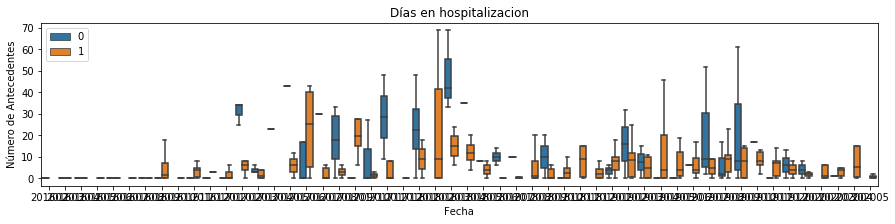

In [22]:
fig, ax = plt.subplots(figsize=(15, 3))
m = sns.boxplot(
        x="fecha",
        y="hos_est_j_sum_6",
        hue="adeherencia_0",
        data=df,
        orient="vertical",
        showfliers=False,
    )

    # Format plot
plt.legend(loc="upper left")
plt.title("Dias en hospitalizacion")
    #plt.xticks(rotation=45)
plt.xlabel("Fecha")
_ = plt.ylabel("Número de Antecedentes")

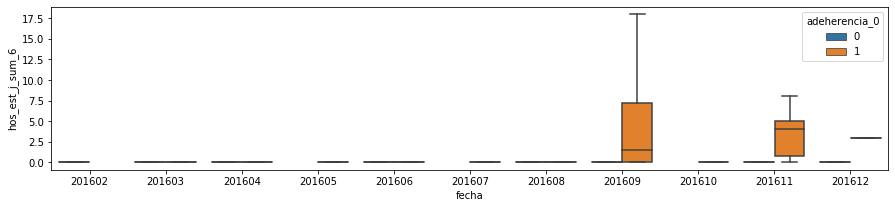

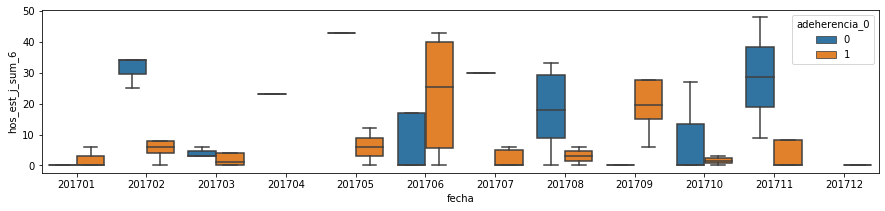

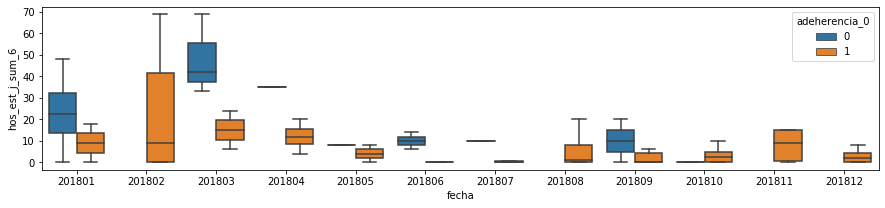

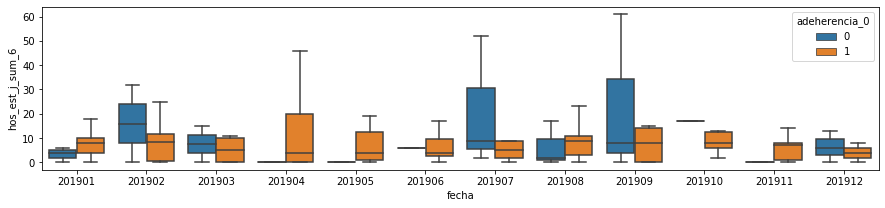

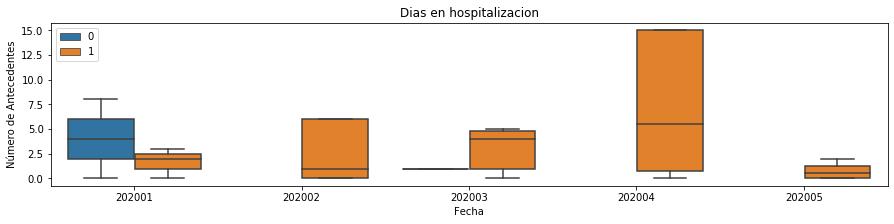

In [23]:
years = [2016,2017,2018,2019,2020]

for y in years :
    fig, ax = plt.subplots(figsize=(15, 3))
    m = sns.boxplot(
        x="fecha",
        y="hos_est_j_sum_6",
        hue="adeherencia_0",
        data=df[df['year']==y],
        orient="vertical",
        showfliers=False,
    )

plt.legend(loc="upper left")
plt.title("Dias en hospitalizacion")
    #plt.xticks(rotation=45)
plt.xlabel("Fecha")
_ = plt.ylabel("Número de Antecedentes")

Se encuentra que en general los pacientes no adherentes presentan más días de hospitalización (en promedio) que los pacientes adherentes.

In [24]:
df.describe()

,id,year,month,adeherencia_0,hos_num_sum_6,hos_num_j_sum_6,hos_uci_sum_6,hos_uci_j_sum_6,hos_uce_sum_6,hos_uce_j_sum_6,...,hos_num_sum_12,hos_num_j_sum_12,hos_uci_sum_12,hos_uci_j_sum_12,hos_uce_sum_12,hos_uce_j_sum_12,hos_est_sum_12,hos_est_j_sum_12,nulls,day
count,5.680000e+02,568.000000,568.000000,568.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,...,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.0
mean,1.146990e+06,2018.068662,6.213028,0.774648,1.487047,0.862694,0.388601,0.297927,0.696891,0.528497,...,1.832746,1.044014,0.528169,0.433099,0.938380,0.686620,19.563380,11.304577,2.563380,1.0
std,4.093329e+05,1.201353,3.442965,0.418182,0.859531,0.891115,1.395456,1.304078,2.272099,2.033605,...,1.311401,1.247148,2.107160,2.032131,2.806783,2.502281,27.729854,20.633285,3.736402,0.0
min,5.029890e+05,2016.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,7.958242e+05,2017.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.0
50%,1.090949e+06,2018.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.000000,1.0
75%,1.496808e+06,2019.000000,9.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,21.250000,13.250000,8.000000,1.0
max,1.999536e+06,2020.000000,12.000000,1.000000,5.000000,4.000000,10.000000,10.000000,27.000000,27.000000,...,9.000000,6.000000,21.000000,21.000000,30.000000,30.000000,315.000000,154.000000,8.000000,1.0


### 3.6 Análisis por Paciente

In [25]:
df_gi = df.groupby('id')['year'].count().reset_index(name = 'cuenta')

print("Estas variables están presentes para " + str(df_gi.shape[0]) + " pacientes únicos. Los pacientes más frecuentes en el tiempo son:")

df_gi.sort_values('cuenta', ascending = False).head(10)

Estas variables están presentes para 171 pacientes únicos. Los pacientes más frecuentes en el tiempo son:


,id,cuenta
31,742708,20
72,1090949,17
92,1255124,14
76,1132214,13
154,1772651,12
50,896933,11
60,978163,10
44,871633,10
117,1463545,10
158,1820617,8


El siguiente conteo revisa de forma independiente los conteos por marca de adherencia.

In [26]:
df_gi = df.groupby(['id','adeherencia_0'])['year'].count().reset_index(name = 'cuenta')

df_gip = df_gi.pivot("id", "adeherencia_0", "cuenta").reset_index()
df_gip.fillna(0, inplace = True )
df_gip['total'] = df_gip[0] + df_gip[1]
df_gip.sort_values('total', ascending = False).head(15)

adeherencia_0,id,0,1,total
31,742708,3.0,17.0,20.0
72,1090949,4.0,13.0,17.0
92,1255124,7.0,7.0,14.0
76,1132214,3.0,10.0,13.0
154,1772651,6.0,6.0,12.0
50,896933,1.0,10.0,11.0
60,978163,4.0,6.0,10.0
44,871633,5.0,5.0,10.0
117,1463545,3.0,7.0,10.0
158,1820617,3.0,5.0,8.0


In [28]:
len(variables2)

6